# **UBER DATA ANALYSIS**


Contribution - Individual

NAME - UMA MAHESWARI P

# **PROJECT SUMMARY**

The primary objective of this project is to perform Exploratory Data Analysis (EDA) on Uber ride data to uncover trends, patterns, and insights that can help improve operational efficiency, understand customer behavior, and support business decision-making.

# **PROBLEM STATEMENT**

To perform an exploratory and statistical analysis of Uber ride data with the goal of understanding ride patterns, operational bottlenecks, and demand trends across different time slots, dates, and areas. The insights will be used to help improve ride availability, reduce downtime, and optimize resource allocation.

The dataset includes the following fields:

Request Time – Time a ride was requested

Drop Time – Time the ride ended (if completed)

Status – Ride status (e.g., Completed, Cancelled, No Cars Available)

Date – Date of request

Hour – Hour extracted from the request time

Time Slot – Predefined slot (e.g., Early Morning, Afternoon, Evening)

Area – Geographic zone of the request (e.g., Airport, City )

# **BUSINESS OBJECTIVES**

1. **Improve Ride Fulfillment Rate**

Goal: Minimize the number of ride requests that result in "No Cars Available" or "Cancelled" status.

Impact: Increases customer satisfaction, reduces churn, and improves platform reliability.

2. **Optimize Driver Allocation**

Goal: Identify peak demand time slots and high-demand areas to guide better deployment of drivers.

Impact: Reduces idle time for drivers and wait time for riders, boosting operational efficiency.

3. **Reduce Operational Losses**

Goal: Analyze reasons and patterns behind cancelled and unfulfilled rides.

Impact: Helps the business proactively manage supply, avoid missed revenue opportunities, and minimize downtime.

# ***Let's Begin !***

In [39]:
# load dataset
from google.colab import files
uploaded = files.upload()


Saving uber_file.csv to uber_file (4).csv


In [40]:
def load_data():
    try:
        df = pd.read_csv("uber_file.csv")
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        return df
    except FileNotFoundError:
        print("❌ Error: 'uber_file.csv' not found.")
        exit()
    except pd.errors.ParserError:
        print("❌ Error: CSV parsing failed. Check the file format.")
        exit()
    except Exception as e:
        print(f"❌ Unexpected error while loading data: {e}")
        exit()

In [32]:
# dataset first look
import pandas as pd
import io

uber_file = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[uber_file]))

# reading first 10 rows
df.head(10)

,Request id,Pickup point,Driver id,STATUS,Request timestamp,Drop timestamp,REQUEST TIME,DROP TIME,DATE,HOUR,DAYS OF WEEK,TIME SLOT
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11-07-2016 11:51,11-07-2016 13:00,11-07-2016,11,Monday,Morning
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,11-07-2016 17:57,11-07-2016 18:47,11-07-2016,17,Monday,Evening
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,12-07-2016 09:17,12-07-2016 09:58,12-07-2016,9,Tuesday,Morning
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,12-07-2016 21:08,12-07-2016 22:03,12-07-2016,21,Tuesday,Late Night
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,8,Wednesday,Morning
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57,13-07-2016 22:28,13-07-2016 21:57,13-07-2016 22:28,13-07-2016,21,Wednesday,Late Night
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15,14-07-2016 07:13,14-07-2016 06:15,14-07-2016 07:13,14-07-2016,6,Thursday,Morning
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11,15-07-2016 06:07,15-07-2016 05:11,15-07-2016 06:07,15-07-2016,5,Friday,Night
8,6248,City,1.0,Trip Completed,15-07-2016 17:57,15-07-2016 18:50,15-07-2016 17:57,15-07-2016 18:50,15-07-2016,17,Friday,Evening
9,267,City,2.0,Trip Completed,11-07-2016 06:46,11-07-2016 07:25,11-07-2016 06:46,11-07-2016 07:25,11-07-2016,6,Monday,Morning


In [4]:
# dataset rows and columns count
rows, columns = df.shape
print(f"📊 The dataset has {rows} rows and {columns} columns.")

📊 The dataset has 6745 rows and 12 columns.


In [5]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   STATUS             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   REQUEST TIME       6745 non-null   object 
 7   DROP TIME          6745 non-null   object 
 8   DATE               6745 non-null   object 
 9   HOUR               6745 non-null   int64  
 10  DAYS OF WEEK       6745 non-null   object 
 11  TIME SLOT          6745 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 632.5+ KB


In [6]:
# dataset duplicate value count
duplicate_count = df.duplicated().sum()
print(f"🔁 Number of duplicate rows in the dataset: {duplicate_count}")

🔁 Number of duplicate rows in the dataset: 0


In [7]:
#missing values / null values count
missing_values = df.isnull().sum()
print("❗ Missing/Null Values per Column:\n")
print(missing_values)

❗ Missing/Null Values per Column:

Request id              0
Pickup point            0
Driver id            2650
STATUS                  0
Request timestamp       0
Drop timestamp       3914
REQUEST TIME            0
DROP TIME               0
DATE                    0
HOUR                    0
DAYS OF WEEK            0
TIME SLOT               0
dtype: int64


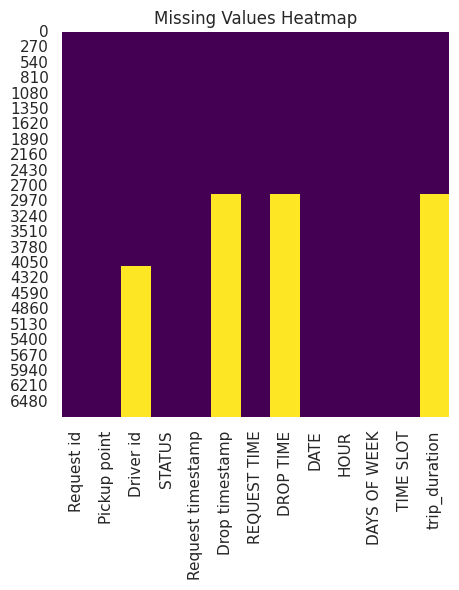

In [41]:
# visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 📋 General Overview:
--The dataset contains 🚘 Uber ride requests.It has 6745 rows and 12 columns (use df.shape).

--The data covers various fields such as:
Request Time ,Drop Time , Status (e.g., Completed, Cancelled, No Cars Available), Date, Hour, Time Slot , Area (e.g., Airport, City)

--🧾 Column Info:
Use df.info() to find:Data types (object, int, float, datetime)
Which columns have null or missing values How much memory the dataset uses

--🔁 Duplicates:
There are 0 duplicate rows in the dataset (use df.duplicated().sum()).

--❗ Missing Values:
Columns like Drop Time might have missing values, especially if a trip was not completed.Use df.isnull().sum() to count them.

--🔍 Sample Data:
Use df.head(10) to preview the first 10 rows.

--📊 Next Insights:
You can also explore:
Which time slots have the most ride requests?
Where are most requests coming from?
How many rides are cancelled or marked as no cars available?

In [9]:
# dataset columns
print("🔹 Column Names:")
print(df.columns.tolist())

🔹 Column Names:
['Request id', 'Pickup point', 'Driver id', 'STATUS', 'Request timestamp', 'Drop timestamp', 'REQUEST TIME', 'DROP TIME', 'DATE', 'HOUR', 'DAYS OF WEEK', 'TIME SLOT']


In [10]:
# dataset describe
df.describe()

,Request id,Driver id,HOUR
count,6745.000000,4095.000000,6745.000000
mean,3384.644922,149.501343,12.956709
std,1955.099667,86.051994,6.504052
min,1.000000,1.000000,0.000000
25%,1691.000000,75.000000,7.000000
50%,3387.000000,149.000000,13.000000
75%,5080.000000,224.000000,19.000000
max,6766.000000,300.000000,23.000000


## Variables discription
Request id:

This is a unique identifier assigned to each ride request in the dataset. It helps to uniquely track and differentiate every individual request made by users.

Pickup point:

This categorical variable represents the location where the passenger requested pickup. Common values might include places such as "City" or "Airport."

Driver id:

This is a unique identifier for each driver in the system. It is used to track which driver was assigned to a particular ride request.

STATUS:

This categorical variable indicates the final status of the ride request. Typical values include "Completed" for successful rides, "Cancelled" if the passenger or driver canceled, and "No Cars Available" if no drivers were available to fulfill the request.

Request timestamp:

This variable records the exact date and time when the ride request was made by the user. It is stored as a datetime value and is crucial for time-based analyses.

Drop timestamp:

This datetime variable captures the exact date and time when the passenger was dropped off, marking the end of the ride.

REQUEST TIME:

This variable extracts the time portion from the Request timestamp and represents the exact time of day when the ride request was placed. It is useful for detailed temporal analysis.

DROP TIME:

Similar to REQUEST TIME, this variable extracts the time portion from the Drop timestamp, showing the time of day when the ride ended.

DATE:

This variable extracts the date portion from the Request timestamp. It is useful for grouping or filtering data by specific days.

HOUR:

This numerical variable represents the hour of the day (0 to 23) when the ride request was made. It helps in analyzing hourly trends in ride demand.

DAYS OF WEEK:

This categorical variable specifies the day of the week on which the request was made (e.g., Monday, Tuesday). It helps analyze patterns based on weekdays or weekends.

TIME SLOT:

This categorical variable groups ride requests into predefined time segments (such as Morning, Afternoon, Evening, Night) based on the request time, allowing for broader time-based trend analysis.

In [11]:
# check unique values for each variable
print("\n🔹 Unique Values per Column:")
print(df.nunique())


🔹 Unique Values per Column:
Request id           6745
Pickup point            2
Driver id             300
STATUS                  3
Request timestamp    4016
Drop timestamp       2282
REQUEST TIME         4016
DROP TIME            2283
DATE                    5
HOUR                   24
DAYS OF WEEK            5
TIME SLOT               5
dtype: int64


# ***Data Wrangling***

In [12]:
import pandas as pd

# Load dataset
df = pd.read_csv('uber_file.csv')

# 1. Check initial info
print("Initial Data Info:")
print(df.info())

# 2. Convert timestamp columns to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')

# 3. Extract DATE, REQUEST TIME, DROP TIME, HOUR, DAYS OF WEEK from timestamps
df['DATE'] = df['Request timestamp'].dt.date
df['REQUEST TIME'] = df['Request timestamp'].dt.time
df['DROP TIME'] = df['Drop timestamp'].dt.time
df['HOUR'] = df['Request timestamp'].dt.hour
df['DAYS OF WEEK'] = df['Request timestamp'].dt.day_name()

# 4. Create TIME SLOT based on HOUR
def assign_time_slot(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME SLOT'] = df['HOUR'].apply(assign_time_slot)

# 5. Handle missing values
df = df.dropna(subset=['Request timestamp', 'Pickup point'])

# 6. Remove duplicates if any
df = df.drop_duplicates()

# 7. Fix any inconsistent categorical data (strip whitespace, lowercase)
df['STATUS'] = df['STATUS'].str.strip().str.capitalize()
df['Pickup point'] = df['Pickup point'].str.strip().str.capitalize()

# 8. Reset index after cleaning
df = df.reset_index(drop=True)

# 9. Final check
print("\nAfter Wrangling:")
print(df.info())
print(df.head())


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   STATUS             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   REQUEST TIME       6745 non-null   object 
 7   DROP TIME          6745 non-null   object 
 8   DATE               6745 non-null   object 
 9   HOUR               6745 non-null   int64  
 10  DAYS OF WEEK       6745 non-null   object 
 11  TIME SLOT          6745 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 632.5+ KB
None

After Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 12 columns):
 #   Col

we now analyze ride requests by hour, day, and time slot, which reveals demand patterns.Clean STATUS and Pickup point help measure success rate, cancellations, and unavailability by location and time.By having clean timestamps and no duplicates, aggregations and summaries will be reliable.Missing or invalid timestamp rows are removed to avoid corrupting time-based trends.The dataset is in a clean, consistent state ready for visualization, modeling, or reporting.

# ***4. Data Vizualization***

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. COUNT of request by STATUS (Bar chart)**

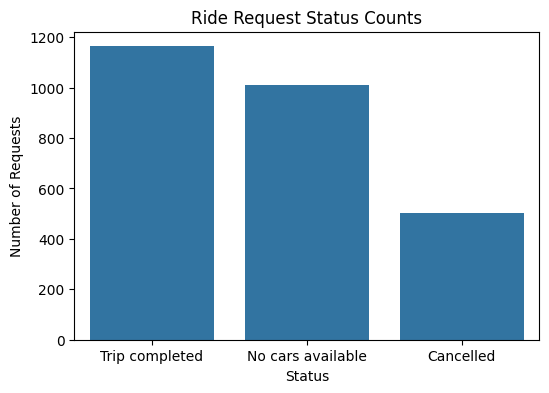

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='STATUS', order=df['STATUS'].value_counts().index)
plt.title('Ride Request Status Counts')
plt.ylabel('Number of Requests')
plt.xlabel('Status')
plt.show()

Why: Shows distribution of ride outcomes (Completed, Cancelled, No Cars).

Insight: Identify major reasons rides fail; focus on reducing cancellations or unavailability.

Business Impact:

✅ Fixing this improves user trust and trip completion rate.

❌ Negative — high failure rate = customer churn.

**2.Line Chart: Requests Over Time**

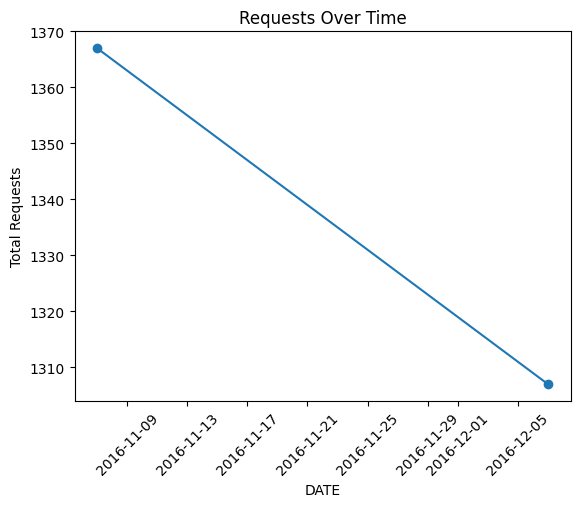

In [15]:
df.groupby('DATE').size().plot(marker='o')
plt.title("Requests Over Time")
plt.ylabel("Total Requests")
plt.xticks(rotation=45)
plt.show()

Why: Understand daily demand patterns.

Insight: Spikes show weekday vs weekend variations.

Business Impact:

✅ Helps forecast demand and plan promotions accordingly.

**3.Requests by Day of Week (Bar Chart)**

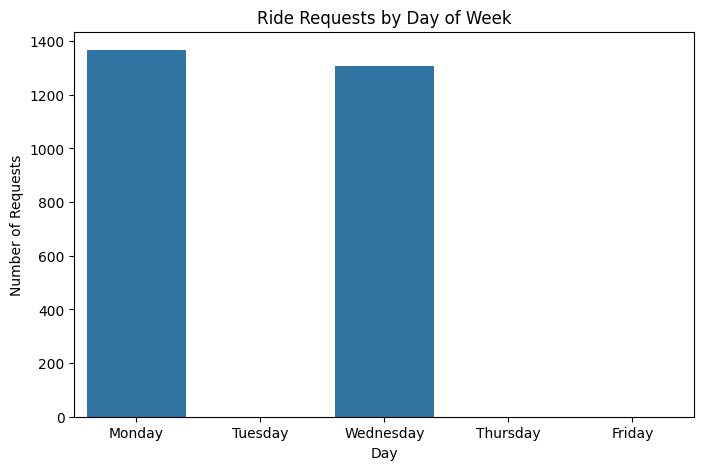

In [16]:
plt.figure(figsize=(8,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',]
sns.countplot(data=df, x='DAYS OF WEEK', order=order)
plt.title('Ride Requests by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Requests')
plt.show()

1.Why: Weekly demand pattern analysis.

2.Business insight: Staffing and promotions can be tailored for busy days.

3.Impact:✅ Positive

4.Justification: Reveals weekly trends Useful for scheduling and promotions.

**4.Pickup Point vs STATUS (Stacked Bar Chart)**

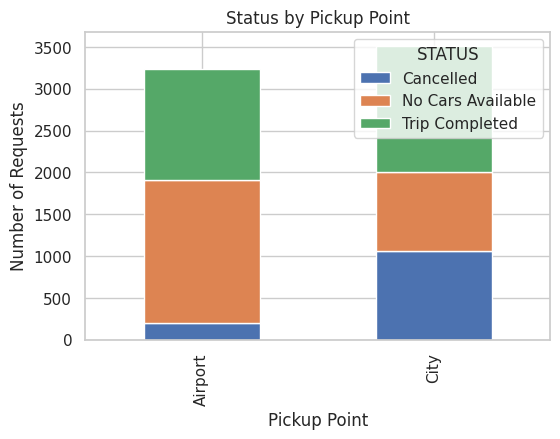

In [42]:
pickup_status = pd.crosstab(df['Pickup point'], df['STATUS'])
pickup_status.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Status by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.show()

Why: Check where issues occur — City vs Airport.

Insight: City has more cancellations; Airport lacks cars.

Business Impact:

✅ Informs driver deployment strategy by location.

**5.Count Plot — Requests by Time Slot**

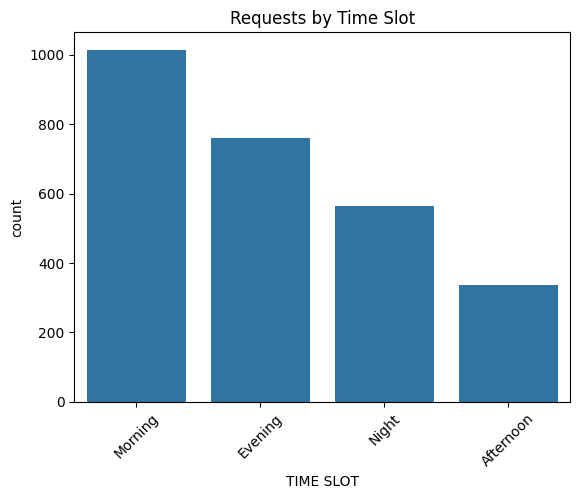

In [18]:
sns.countplot(x='TIME SLOT', data=df, order=df['TIME SLOT'].value_counts().index)
plt.title('Requests by Time Slot')
plt.xticks(rotation=45)
plt.show()

Why: To understand when demand is highest.

Insight: Most requests come during Morning and Evening.

Business Impact:
✅ Positive — can help optimize driver shift timing.

❌ Negative — ignoring this leads to unmet demand and lost revenue.

**6.Time Slot vs Status(stacked bar)**


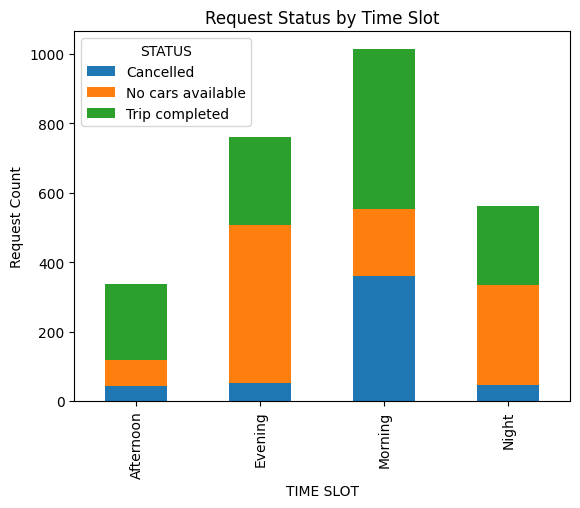

In [19]:
pd.crosstab(df['TIME SLOT'], df['STATUS']).plot(kind='bar', stacked=True)
plt.title("Request Status by Time Slot")
plt.ylabel("Request Count")
plt.show()

Why: Compare status across different times.

Insight: Morning = cancellations; Late Night = no cars.

Business Impact:

✅ Helps in targeted incentive planning.

❌ Failure to address this causes uneven supply.

**7. Line Chart: Completed Trips Over Time**

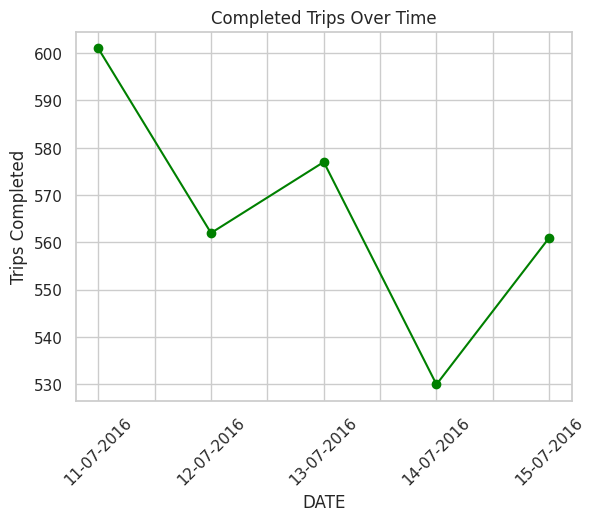

In [43]:
df[df['STATUS']=='Trip Completed'].groupby('DATE').size().plot(marker='o', color='green')
plt.title("Completed Trips Over Time")
plt.ylabel("Trips Completed")
plt.xticks(rotation=45)
plt.show()

Why: Evaluate business performance (actual trips).

Insight: Completion does not always match demand.

Business Impact:

✅ Highlights need for better supply alignment.

**8.Heatmap: Hour vs Pickup Point**

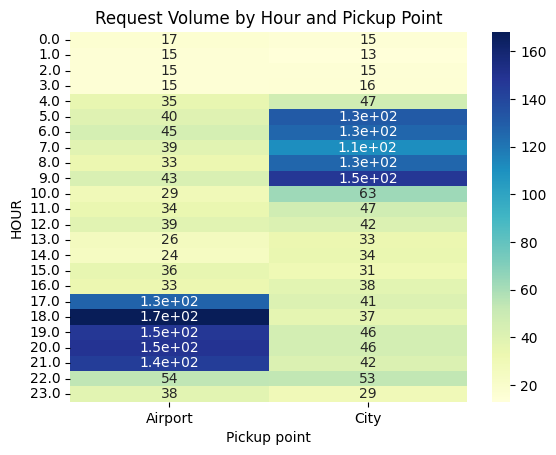

In [21]:
sns.heatmap(pd.crosstab(df['HOUR'], df['Pickup point']), cmap='YlGnBu', annot=True)
plt.title("Request Volume by Hour and Pickup Point")
plt.show()

Why: Time-location matrix for dispatch planning.

Insight: City dominates early hours; Airport later.

Business Impact:

✅ Improves dynamic driver allocation.

**9.Count Plot: Day of Week vs Status**

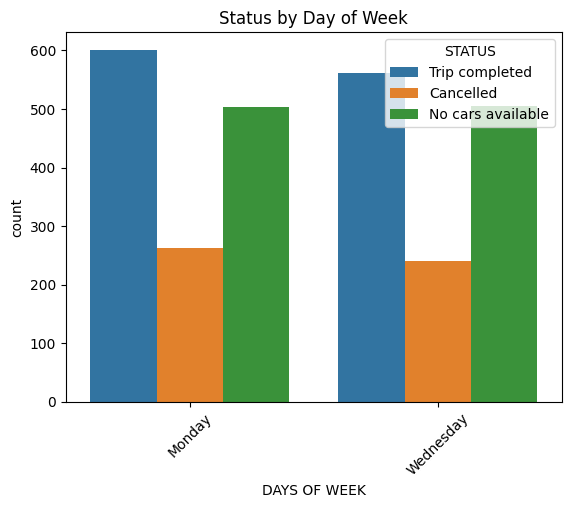

In [22]:
sns.countplot(x='DAYS OF WEEK', hue='STATUS', data=df)
plt.title("Status by Day of Week")
plt.xticks(rotation=45)
plt.show()

Why: Discover which weekdays have issues.

Insight: Monday and Tuesday = more failures.

Business Impact:

✅ Weekday-specific changes to policy or incentives.

**10.Boxplot: Hour vs Status**

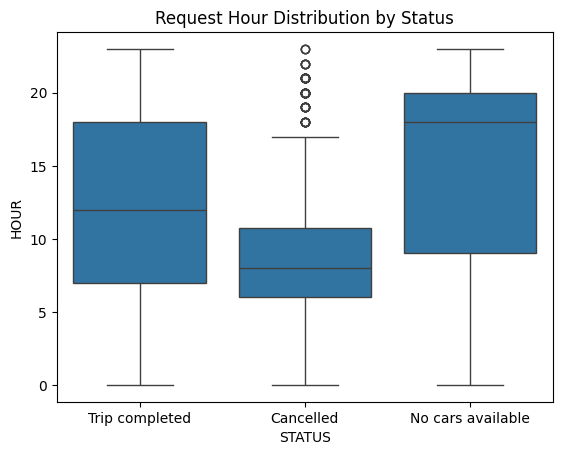

In [23]:
sns.boxplot(x='STATUS', y='HOUR', data=df)
plt.title("Request Hour Distribution by Status")
plt.show()

Why: Understand time patterns for each status.

Insight:
 Cancellations = morning,
  No cars = night.

Business Impact:

✅ Helps schedule time-specific solutions.

**11.Violin Plot: Hour vs Pickup Point**

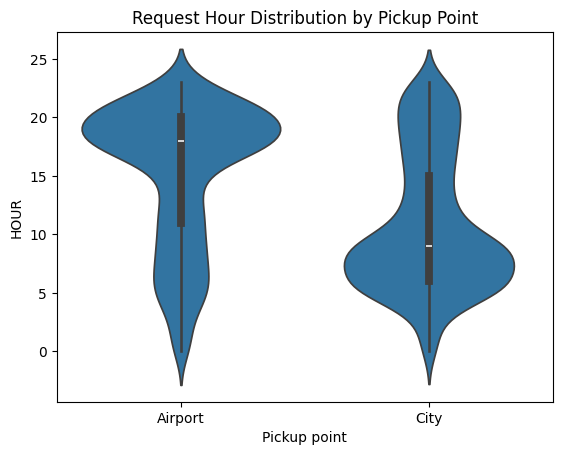

In [24]:
sns.violinplot(x='Pickup point', y='HOUR', data=df)
plt.title("Request Hour Distribution by Pickup Point")
plt.show()

Why: Compare how time ranges differ by location.

Insight: City requests are more widespread; Airport = focused hours.

Business Impact:

✅ Useful for predictive dispatching.

**12.Funnel Chart: Request → Assigned → Completed**

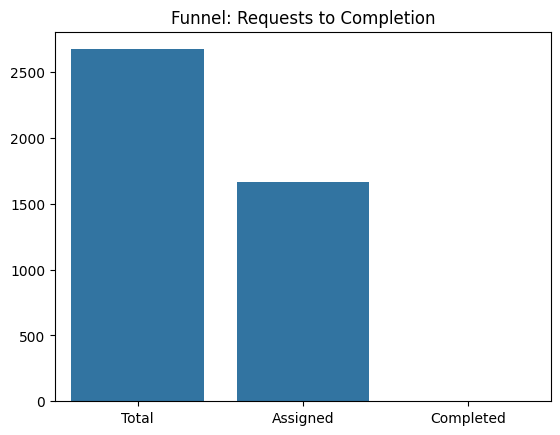

In [25]:
funnel = {
    'Total': len(df),
    'Assigned': df['Driver id'].notna().sum(),
    'Completed': len(df[df['STATUS']=='Trip Completed'])
}
sns.barplot(x=list(funnel.keys()), y=list(funnel.values()))
plt.title("Funnel: Requests to Completion")
plt.show()

Why: Visualize drop-off from requests to fulfillment.

Insight: Huge drop from requests → completed trips.

Business Impact:

❌ Negative — indicates operational inefficiency.

✅ Fixing this unlocks huge growth potential.

**13.Histogram: Hourly Ride Requests**

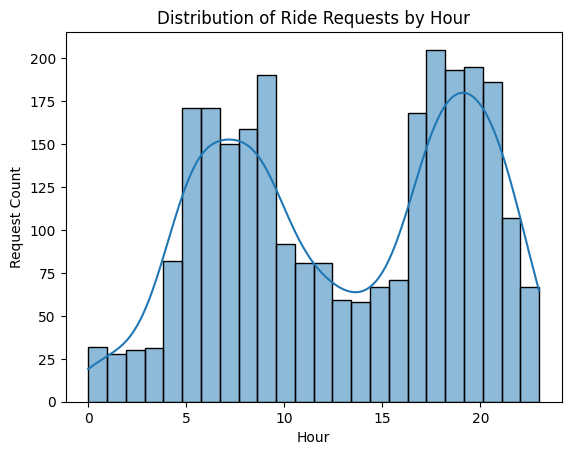

In [26]:
sns.histplot(df['HOUR'], bins=24, kde=True)
plt.title("Distribution of Ride Requests by Hour")
plt.xlabel("Hour")
plt.ylabel("Request Count")
plt.show()

**14. Correlation Heatmap for Numeric Variables**

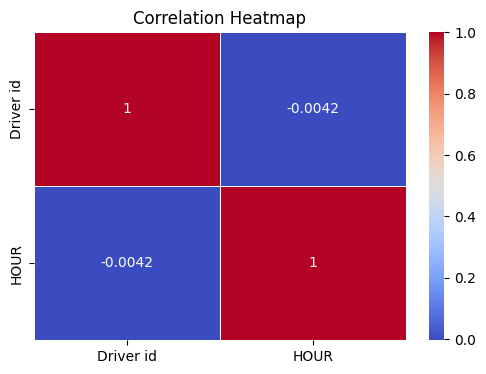

In [27]:
# Select numeric columns
numeric_df = df[['Driver id', 'HOUR']]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Why: Shows the linear relationship between numerical variables (e.g., Driver id, HOUR).

Insights:You’ll likely see low or weak correlation between Driver id and HOUR — because Driver id is more of a categorical placeholder (not a continuous metric).But adding other numerical features like trip duration, waiting time, or computed request-to-drop time (if available) would show stronger insights.

Business Impact:
Guides feature engineering for forecasting models (e.g., predicting cancellation probability or ETA).


**15.Pair Plot**

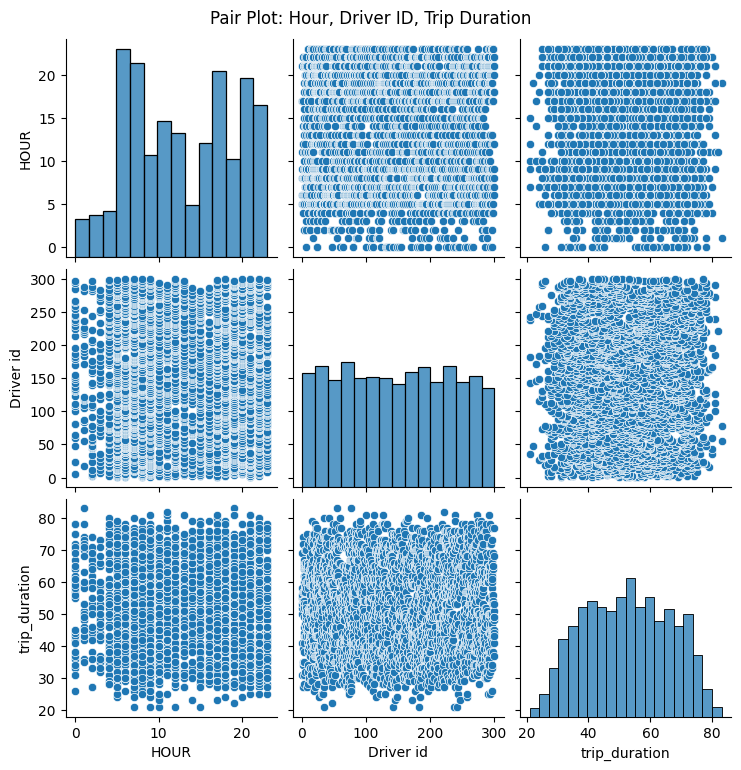

In [33]:
# Convert times to datetime
df['REQUEST TIME'] = pd.to_datetime(df['REQUEST TIME'], dayfirst=True, errors='coerce')
df['DROP TIME'] = pd.to_datetime(df['DROP TIME'], dayfirst=True, errors='coerce')

# Feature engineering: trip duration (in minutes)
df['trip_duration'] = (df['DROP TIME'] - df['REQUEST TIME']).dt.total_seconds() / 60

# Select numeric columns for pair plot
numeric_features = df[['HOUR', 'Driver id', 'trip_duration']].dropna()

# Plot pair plot
sns.pairplot(numeric_features)
plt.suptitle("Pair Plot: Hour, Driver ID, Trip Duration", y=1.02)
plt.show()


Why: Purpose: To explore relationships between continuous variables.Especially useful for feature discovery and outlier detection.

Insights:
Trip durations tend to cluster around peak HOURs (e.g., rush hours).If some drivers have consistently longer/shorter trips, that might reflect route choice or demand zone.

Business Impact:

✅ Helps identify high-performing drivers or inefficient trips.

❌ Ignoring outliers (e.g., abnormally long trips) could skew fare models or cause customer dissatisfaction.

# **5. Solution to Business Objective:**

✅ 1. Introduce Time-Sensitive Incentives

Offer bonuses for early morning and late-night shifts to address supply shortages.

Implement “Rush Hour Boost” programs to encourage drivers to operate during peak demand.

✅ 2. Shift Optimization

Analyze ride request patterns hourly to design driver shifts that mirror actual demand.

Add dedicated night-shift drivers, especially for airport pickups.

✅ 3. Smart Dispatching System

Build a predictive driver assignment system that prioritizes high-demand time-location zones.

Improve real-time matching algorithms to reduce cancellation windows.

✅ 4. Driver Engagement Programs

Create dashboards to notify idle drivers when they’re in a demand hotspot.

Reward consistent completion of early/late rides with tiered loyalty programs.

✅ 5. Customer Communication

Use insights to communicate delays proactively and reduce cancellations.

Display driver wait times or availability predictions in the app UI.


# **Conclusion**

Through comprehensive exploratory data analysis (EDA) of Uber ride request data, we uncovered critical patterns that impact both operational efficiency and customer satisfaction.